In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from IPython.display import IFrame

df = pd.read_csv('titanic_v2.csv', sep=';')
print(df.shape)
df.dropna(axis=0, how='all', inplace=True)
df.drop_duplicates()
print(df.head(10))
df.shape

(1309, 4)
   pclass     sex      age  survived
0       1  female  29.0000         1
1       1    male   0.9167         1
2       1  female   2.0000         0
3       1    male  30.0000         0
4       1  female  25.0000         0
5       1    male  48.0000         1
6       1  female  63.0000         1
7       1    male  39.0000         0
8       1  female  53.0000         1
9       1    male  71.0000         0


(1309, 4)

In [3]:
#muutetaan muuttujatyyppi numeeriseksi
df['sex'] = df['sex'].map({'male': 1, 'female': 2})
df.dtypes

pclass        int64
sex           int64
age         float64
survived      int64
dtype: object

In [4]:
df['survived'].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

3) Datan valmistelu

In [9]:
# tallentaan muuttujien nimet listaan
colnames = df.columns
colnames

Index(['pclass', 'sex', 'age', 'survived'], dtype='object')

In [11]:
# otetaan selittävät muuttujat talteen dataframeen
X = df.loc[:, 'pclass':'age']
# otetaan vastemuuttuja talteen series-olioon
y = df.loc[:, 'survived']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train , y_test = train_test_split(X, y, 
   test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(1047, 3)
(262, 3)


In [13]:
# päätöspuuluokitteluja
classifier = tree.DecisionTreeClassifier(max_depth=2)
#sovitetaan muuttujat malliin
classifier.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
#päätösketjun avaaminen
print(tree.export_text(classifier, feature_names=list(colnames[:3])))

|--- sex <= 1.50
|   |--- age <= 9.50
|   |   |--- class: 1
|   |--- age >  9.50
|   |   |--- class: 0
|--- sex >  1.50
|   |--- pclass <= 2.50
|   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- class: 0



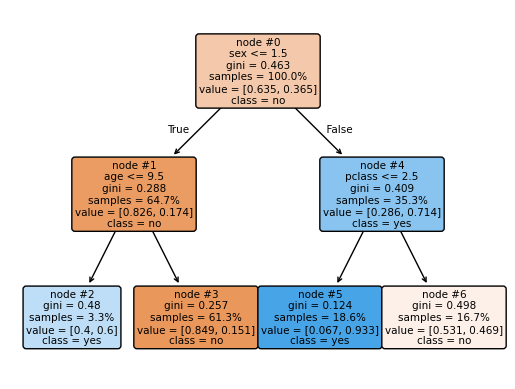

In [15]:
#päätöspuun kuvantaminen

tree.plot_tree(classifier,
               max_depth=3, 
               feature_names=colnames[:3], 
               class_names=['no', 'yes'], 
               label='all', 
               filled=True, 
               impurity=True, 
               node_ids=True, 
               proportion=True, 
               rounded=True, 
               precision=3, 
               ax=None, 
               fontsize=None)
plt.show()


Mallin toimivuuden arvioiminen

In [16]:
#suhteellinen ennustaminen
Y_pred_proba= classifier.predict_proba(X_test)
print(Y_pred_proba)

[[0.84890966 0.15109034]
 [0.84890966 0.15109034]
 [0.84890966 0.15109034]
 [0.84890966 0.15109034]
 [0.84890966 0.15109034]
 [0.84890966 0.15109034]
 [0.84890966 0.15109034]
 [0.84890966 0.15109034]
 [0.84890966 0.15109034]
 [0.06666667 0.93333333]
 [0.84890966 0.15109034]
 [0.84890966 0.15109034]
 [0.53142857 0.46857143]
 [0.84890966 0.15109034]
 [0.84890966 0.15109034]
 [0.53142857 0.46857143]
 [0.84890966 0.15109034]
 [0.53142857 0.46857143]
 [0.06666667 0.93333333]
 [0.84890966 0.15109034]
 [0.53142857 0.46857143]
 [0.84890966 0.15109034]
 [0.84890966 0.15109034]
 [0.84890966 0.15109034]
 [0.84890966 0.15109034]
 [0.53142857 0.46857143]
 [0.84890966 0.15109034]
 [0.06666667 0.93333333]
 [0.53142857 0.46857143]
 [0.06666667 0.93333333]
 [0.84890966 0.15109034]
 [0.4        0.6       ]
 [0.53142857 0.46857143]
 [0.06666667 0.93333333]
 [0.84890966 0.15109034]
 [0.84890966 0.15109034]
 [0.06666667 0.93333333]
 [0.84890966 0.15109034]
 [0.06666667 0.93333333]
 [0.84890966 0.15109034]


In [17]:
# luokan ennustaminen
Y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
print("Confusion matrix:\n",cm)
accuracy = accuracy_score(y_test, Y_pred)
print("Accuracy calculated from the training set = %.3f (SUBJECT TO OVERFITTING)" % (accuracy))
print(classification_report(y_test, Y_pred, target_names=['no', 'yes']))

Confusion matrix:
 [[136   8]
 [ 63  55]]
Accuracy calculated from the training set = 0.729 (SUBJECT TO OVERFITTING)
              precision    recall  f1-score   support

          no       0.68      0.94      0.79       144
         yes       0.87      0.47      0.61       118

    accuracy                           0.73       262
   macro avg       0.78      0.71      0.70       262
weighted avg       0.77      0.73      0.71       262



In [18]:
# ristiinvalidointi
# osien määrä
k = 10
scores = cross_val_score(estimator=classifier,
X=X_test,
y=y_test,
scoring="accuracy",
cv=k)
print("Accuracies from %d individual folds:" % k)
print(scores)
print("Accuracy calculated using %d-fold cross validation = %.3f" % (k, scores.mean()))

Accuracies from 10 individual folds:
[0.77777778 0.77777778 0.80769231 0.53846154 0.69230769 0.65384615
 0.80769231 0.69230769 0.69230769 0.73076923]
Accuracy calculated using 10-fold cross validation = 0.717
